#Breast Cancer Data



> En todo el mundo, el cáncer de seno es el tipo de cáncer más común en las mujeres y el segundo más alto en términos de tasas de mortalidad. El diagnóstico de cáncer de seno se realiza cuando se encuentra un bulto anormal (de autoexamen o rayos X) o una pequeña mota(en una radiografía). Después de encontrar un bulto sospechoso, el médico realizará un diagnóstico para determinar si es canceroso y, de ser así, si se ha diseminado a otras partes del cuerpo.



> Este conjunto de datos sobre el cáncer de mama se obtuvo de los Hospitales de la Universidad de Wisconsin, Madison, del Dr. William H. Wolberg.





In [0]:
import pandas as pd

In [8]:
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


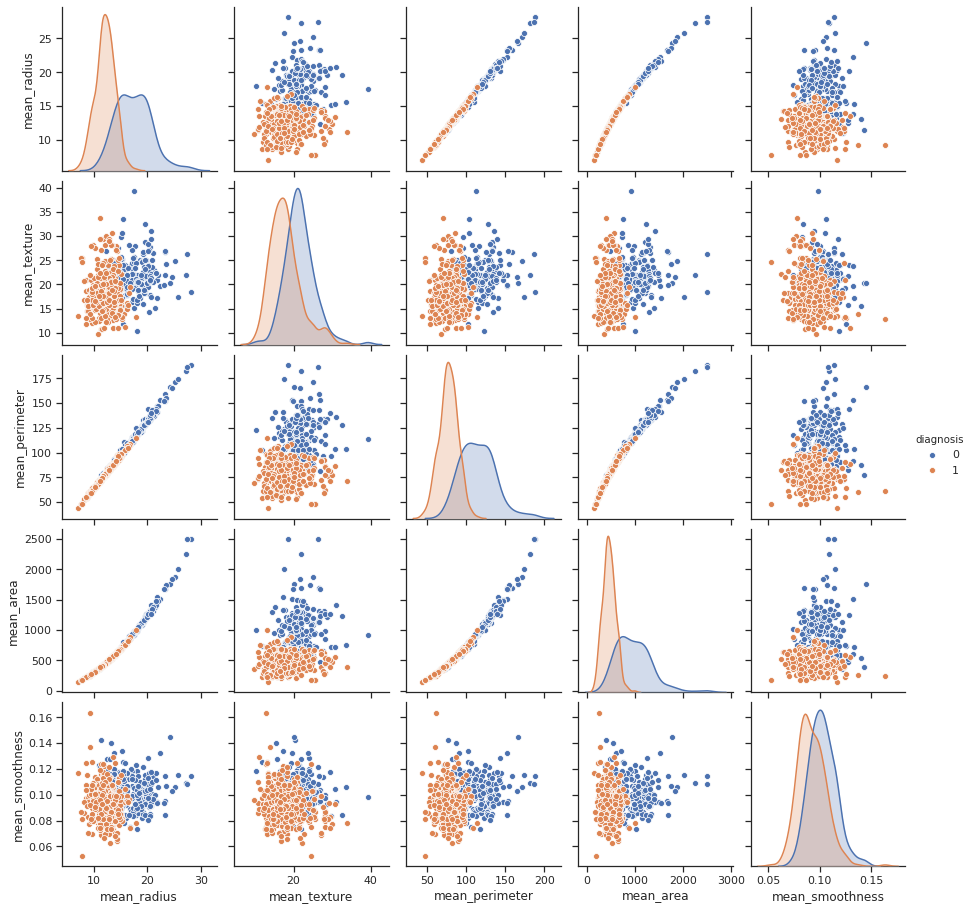

In [6]:
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="diagnosis")

##Data Train y Data Test

In [0]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=6)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (455, 5)
X_test shape: (114, 5)


##Normalizar Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##KNN



> Buscar el mejor método y métrica para obtener el mayor score, anotar para cada uno con el mejor K (n_neighbors).


1.   weights: **uniform** ->
2.   weights: **distance** metric: **euclidean** ->
3.   weights: **distance** metric: **manhattan** ->
4.   weights: **distance** metric: **cosine** ->
5.   weights: **distance** metric: **minkowski** ->








In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:
classifier.score(X_test,y_test)

0.9210526315789473



> Probar aquí las diferentes configuraciones y gráficar para hallar el K óptimo para cada uno



In [0]:
max_depth_range = list(range(2, 15))
accuracy_KNN = []
for depth in max_depth_range:
    classifier2 = KNeighborsClassifier(n_neighbors=depth,weights='distance',metric='manhattan') #Cambiar aquí
    classifier2.fit(X_train, y_train)  
    score = classifier2.score(X_test, y_test)
    
    accuracy_KNN.append(score)

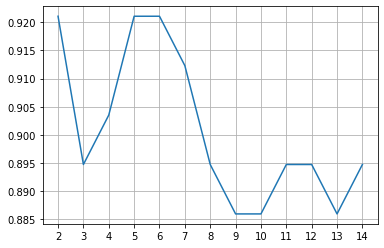

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracy_KNN)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

##Decision Tree



> Hallar el max_depth óptimo para obtener el score máximo



In [0]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=4) #Reemplazar aquí el max_depth hallado en la parte inferior
arbol.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
arbol.score(X_test,y_test)

0.9210526315789473

In [0]:
max_depth_range = list(range(2, 15))
accuracy_arbol = []
for depth in max_depth_range:
    arbol2 = DecisionTreeClassifier(max_depth = depth)
    arbol2.fit(X_train,y_train) 
    score = arbol2.score(X_test, y_test)
    
    accuracy_arbol.append(score)

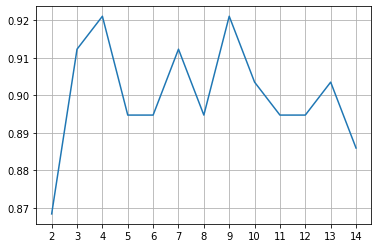

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracy_arbol)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

##Matriz de Confusión



> Mostrar la matriz de confusión y con la función classification_report mostrar el valor de precision y recall





> KNN



In [0]:
y_pred = classifier.predict(X_test)
df_confusion_KNN = pd.crosstab(y_test, y_pred,rownames=['Original'], colnames=['Predicted'])
df_confusion_KNN

Predicted,0,1
Original,,
0,48,8
1,1,57


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        56
           1       0.88      0.98      0.93        58

    accuracy                           0.92       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.92      0.92       114





> Árbol de Clasificación



In [0]:
y_pred = arbol.predict(X_test)
df_confusion_arbol = pd.crosstab(y_test, y_pred,rownames=['Original'], colnames=['Predicted'])
df_confusion_arbol

Predicted,0,1
Original,,
0,51,5
1,4,54


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.92      0.93      0.92        58

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



##Cross Validation



> Realizar el Cross Validation con las configuraciones óptimas





> Árbol de Clasificación



In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [0]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y[train_index], y[test_index]
  
  arbol3 = DecisionTreeClassifier(max_depth=4)
  arbol3.fit(X_train_cv,y_train_cv)

  y_pred_cv = arbol3.predict(X_test_cv)
  AccFolder = metrics.accuracy_score(y_test_cv, y_pred_cv)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Accuracy Folder 71.9298245614035
Accuracy Folder 84.21052631578947
Accuracy Folder 84.21052631578947
Accuracy Folder 92.98245614035088
Accuracy Folder 96.49122807017544
Accuracy Folder 92.98245614035088
Accuracy Folder 92.98245614035088
Accuracy Folder 96.49122807017544
Accuracy Folder 87.71929824561403
Accuracy Folder 91.07142857142857
Accuracy General: 89.10714285714286


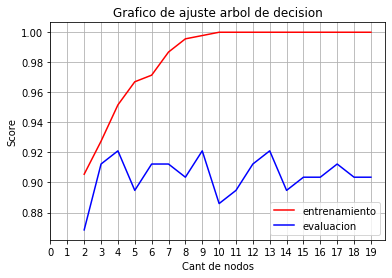

In [0]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(max_depth=deep)
    arbol3.fit(X_train,y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.grid()
plt.xticks(list(range(max(max_deep_list)+1)),list(range(max(max_deep_list)+1)))
plt.ylabel('Score')
plt.xlabel('Cant de nodos')
plt.show()



> KNN



In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [0]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y[train_index], y[test_index]
  
  classifier3 = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='manhattan')
  classifier3.fit(X_train_cv, y_train_cv)

  y_pred_cv = classifier3.predict(X_test_cv)
  AccFolder = metrics.accuracy_score(y_test_cv, y_pred_cv)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Accuracy Folder 80.7017543859649
Accuracy Folder 94.73684210526315
Accuracy Folder 91.22807017543859
Accuracy Folder 89.47368421052632
Accuracy Folder 96.49122807017544
Accuracy Folder 96.49122807017544
Accuracy Folder 92.98245614035088
Accuracy Folder 96.49122807017544
Accuracy Folder 94.73684210526315
Accuracy Folder 89.28571428571429
Accuracy General: 92.26190476190476


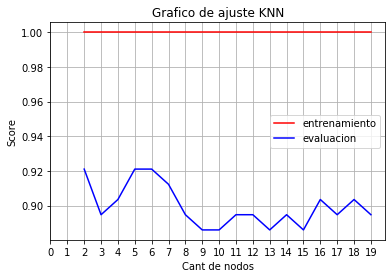

In [0]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

for deep in max_deep_list:
    classifier3 = KNeighborsClassifier(n_neighbors=deep,weights='distance',metric='manhattan') #Colocar aquí la metrica adecuada
    classifier3.fit(X_train, y_train)
    train_prec.append(classifier3.score(X_train, y_train))
    eval_prec.append(classifier3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste KNN')
plt.legend()
plt.grid()
plt.xticks(list(range(max(max_deep_list)+1)),list(range(max(max_deep_list)+1)))
plt.ylabel('Score')
plt.xlabel('Cant de nodos')
plt.show()

##Curva ROC



> KNN



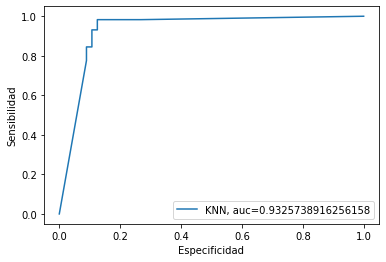

In [0]:
# Cálculo del AUC y gráfica de la Curva ROC
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))
plt.xlabel("Especificidad")
plt.ylabel("Sensibilidad")
plt.legend(loc=4)
plt.show()



> Árbol de Clasificación



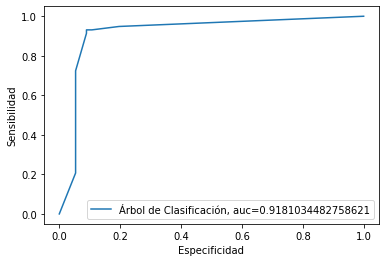

In [0]:
# Cálculo del AUC y gráfica de la Curva ROC
y_pred_proba = arbol.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Árbol de Clasificación, auc="+str(auc))
plt.xlabel("Especificidad")
plt.ylabel("Sensibilidad")
plt.legend(loc=4)
plt.show()

##Elección del método de predicción



> Analizar la matriz de confusión ¿Qué valor tomará más importancia? ¿Precision o Recall? ¿De cúal valor? Justifique. Tomando en cuenta solo la matriz de confusión ¿Cúal método eligiria?



Completar



> Analizar el cross validation. Tomando en cuenta solo este método ¿Cúal método elegiria? Justifique



Completar

Analizar la curva ROC. ¿Cúal método nos da una mejor área bajo la curva?

Completar



> Tomando en cuenta los 3 métodos de evaluación ¿Cúal método elegiría? Justifique



Completar